1. 임베딩의 개념과 필요성

```
문자를 단순히 숫자로 매핑 dog=1 cat=2 human=3 king=4 queen=5
단어들간의 의미를 반영 못함
dog, puppy -- 비슷한 숫자표현(벡터)
one-hot-encoding : 각 단어를 고유한 이진 벡터로 표현
단어수 만큼 차원이 확장, 해당 단어의 위치만 1로 하고 나머지는 0
cat 001
dog 010
bird 100
대표적인 희소벡터 --> 계산이 비효율적
```

2. 임베딩

```
단어를 고정된 길이의 벡터(100차원)로 매핑
비슷한 단어는 가까이 위치
역할
  의미를 보전 : 단어간의 유사도를 계산
  저차원 표현 : 메모리, 계산적 측면에서의 이득
```

In [ ]:
! pip install gensim # word2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 674.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 994.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip uninstall numpy
!pip install numpy==1.23.5

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.11
    /usr/local/lib/python3.11/dist-packages/numpy-1.23.5.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/uninstall.py", line 106, in run
    uninstall_pathset = req.uninstall(
                        ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pi

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity  # 두 벡터간의 코사인 유사도 계산
from gensim.models import KeyedVectors  # 사전 학습된 모델을 불러올때 사용
import gensim.downloader as api  # Word2Vec 모델을 다운로드할 api

# 1.one hot encoder
def one_hot_encoding(vocab):  # [ , , , ]
  vocab_size =len(vocab)
  one_hot_vectors =  np.zeros((vocab_size, vocab_size))
  for i, word in enumerate(vocab):
    one_hot_vectors[i,i] = 1
  return one_hot_vectors

# 단어리스트
vocab = ['dog','cat','puppy','bird']
one_hot_vectors = one_hot_encoding(vocab)
# print(one_hot_vectors)

# one-hot 코사인 유사도  (단어쌍에 대한 유사도)
print('one-hot 코사인 유사도  (단어쌍에 대한 유사도)')
one_hot_simularity =  cosine_similarity(one_hot_vectors)
for i,word1 in enumerate(vocab):
  for j, word2 in enumerate(vocab):
    if i < j: # 자기자신과 비교하지 않기위해서
      print(f'{word1}과 {word2}의 유사도 : {one_hot_simularity[i,j]}')

# 사전학습 Word2Vec 임베딩
word2vec_model = api.load('word2vec-google-news-300')  # 구글뉴스 기반의 word2vec
print('word2vec 벡터..')
for word in vocab:
  if word in word2vec_model:
    vector = word2vec_model[word][:5] # 5개 차원만 출력
    print(f'{word} : {vector}')
  else:
    print(f'{word} 모델에 없음')

one-hot 코사인 유사도  (단어쌍에 대한 유사도)
dog과 cat의 유사도 : 0.0
dog과 puppy의 유사도 : 0.0
dog과 bird의 유사도 : 0.0
cat과 puppy의 유사도 : 0.0
cat과 bird의 유사도 : 0.0
puppy과 bird의 유사도 : 0.0
[==================================================] 100.0% 1662.8/1662.8MB downloaded
word2vec 벡터..
dog : [ 0.05126953 -0.02233887 -0.17285156  0.16113281 -0.08447266]
cat : [ 0.0123291   0.20410156 -0.28515625  0.21679688  0.11816406]
puppy : [ 0.07177734  0.11425781 -0.11767578  0.10205078 -0.07226562]
bird : [ 0.08447266  0.125      -0.33789062  0.02954102 -0.01623535]


In [ ]:
print('word2vec 벡터 간의 코사인 유사도')
for i, word1 in enumerate(vocab):
  for j, word2 in enumerate(vocab):
    if i < j and word1 in word2vec_model and word2 in word2vec_model:
      similarity = word2vec_model.similarity(word1, word2)
      print(f'{word1}과 {word2}의 유사도 : {similarity}')

word2vec 벡터 간의 코사인 유사도
dog과 cat의 유사도 : 0.760945737361908
dog과 puppy의 유사도 : 0.8106428384780884
dog과 bird의 유사도 : 0.45044052600860596
cat과 puppy의 유사도 : 0.7075453400611877
cat과 bird의 유사도 : 0.5146262645721436
puppy과 bird의 유사도 : 0.3901273310184479


Word Embedding
```
count기반과 predict 기반 임베딩
LSA VS LDA
Word2Vec GloVe
실습 : Count기반과 Predict기반 임베딩 비교
```
```
count기반 임베딩 : 문장에 단어가 얼마나자주 같이 나타나는지 세는것
문서전체를 보고 단어간 관계를 숫자로 정리(표)
The cat runs / The dog runs
predict기반 임베딩: 단어하나를 보고 옆에올 단어를 맞추는 퀴즈와 같이 cat 다음에 run이 자주오면 cat은 run과 관련이 있다고 학습

LSA(Latent Semantic Anaylysis)
  Count기반 , 단어의 빈도를 표(행렬)로 만들고-> 저차원으로 축소하면서 중요 패턴을 찾음
  한계 : 문맥무시, 작은데이터에서는 잘 안됨
LDA(Latent Dirchlet Allocation)
  문서의 주제를 찾는 방법, 각 문장에서 어떤 주제로 이루어졌는지 각 주제에 어떤 단어가 중요한지 계산
  cat과 dog가 애완동물 주제에서 나오면 두 벡터는 비슷한 위치에 놓음
  한계 : 주제에 촛점을 맞추다보니.. 미묘한 단어사이의 의미반영 어려움  (king,  queen),
  단어순서를 고려 안함

Word2Vec, Glove
  단어의 문맥을 보고 의미를 학습

Word2Vec
  predict 기반으로 문맥을 분석해서 중심단어, 중심단어로 문맥
  king-man+woman = queen  단어간의 관계를 학습
Glove
  count기반 predict 기반의 장점을 합침
  큰데이터에서 더 정확한 임베딩
```

# Count기반(LSA) vs Predict기반(Word2Vec)

In [ ]:
# 최초 한번 실행후 세션 재시작
!pip uninstall numpy
!pip install numpy==1.23.5

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.11
    /usr/local/lib/python3.11/dist-packages/numpy-1.23.5.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.23.5
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requ

ERROR: Operation cancelled by user
^C


In [ ]:
!pip install gensim

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.models import KeyedVectors
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity

documents = [
    "The cat runs and plays with the dog",
    "Dogs are loyal and love to play",
    "Basketball is a fun sport to play",
    "Soccer players run fast on the field",
    "Cats and dogs are great pets"
]
# count기반 임베딩 생성
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
word_list = vectorizer.get_feature_names_out()
print(f'단어리스트 : {word_list}')

# LSA(SVD로 차원축소)
print('LSA 단어 벡터(2차원)')
lsa = TruncatedSVD(n_components=2)
X.shape, X.T.shape
word_embeddings_lsa = lsa.fit_transform(X.T)
for word, embedding in zip(word_list,word_embeddings_lsa):
  print(f'{word} : {embedding}')

print('LSA 벡터간 코사인 유사도')
# 저장
lsa_simularity_listis = []

lsa_simularity = cosine_similarity(word_embeddings_lsa)
for i,word1 in enumerate(word_list):
  for j, word2 in enumerate(word_list):
    if i < j:
      # print(f'{word1}  {word2} : {lsa_simularity[i,j]}')
      lsa_simularity_listis.append((word1,word2,lsa_simularity[i,j]))

# predict 기반 word2Vec
word2vec_model_lists = []
word2vec_model = api.load('word2vec-google-news-300')
print('word2vec 단어 벡터(2차원)')
target_words = ['cat','dog','play','sport']
for i,word1 in enumerate(target_words):
  for j, word2 in enumerate(target_words):
    if i < j and word1 in word2vec_model and word2 in word2vec_model:
      similarity = word2vec_model.similarity(word1, word2)
      # print(f'{word1}  {word2} : {similarity}')
      word2vec_model_lists.append((word1,word2,similarity))

단어리스트 : ['and' 'are' 'basketball' 'cat' 'cats' 'dog' 'dogs' 'fast' 'field' 'fun'
 'great' 'is' 'love' 'loyal' 'on' 'pets' 'play' 'players' 'plays' 'run'
 'runs' 'soccer' 'sport' 'the' 'to' 'with']
LSA 단어 벡터(2차원)
and : [1.53911269 0.55940199]
are : [0.78328972 1.00989204]
basketball : [0.14770586 0.35599837]
cat : [ 0.75582296 -0.45049005]
cats : [0.35055038 0.40207218]
dog : [ 0.75582296 -0.45049005]
dogs : [0.78328972 1.00989204]
fast : [ 0.31107189 -0.37311775]
field : [ 0.31107189 -0.37311775]
fun : [0.14770586 0.35599837]
great : [0.35055038 0.40207218]
is : [0.14770586 0.35599837]
love : [0.43273935 0.60781986]
loyal : [0.43273935 0.60781986]
on : [ 0.31107189 -0.37311775]
pets : [0.35055038 0.40207218]
play : [0.5804452  0.96381823]
players : [ 0.31107189 -0.37311775]
plays : [ 0.75582296 -0.45049005]
run : [ 0.31107189 -0.37311775]
runs : [ 0.75582296 -0.45049005]
soccer : [ 0.31107189 -0.37311775]
sport : [0.14770586 0.35599837]
the : [ 1.82271781 -1.27409785]
to : [0.5804452  

In [ ]:
sorted(lsa_simularity_listis, key = lambda x : x[2], reverse=True)

[('fast', 'field', 1.0000000000000002),
 ('fast', 'on', 1.0000000000000002),
 ('fast', 'players', 1.0000000000000002),
 ('fast', 'run', 1.0000000000000002),
 ('fast', 'soccer', 1.0000000000000002),
 ('field', 'on', 1.0000000000000002),
 ('field', 'players', 1.0000000000000002),
 ('field', 'run', 1.0000000000000002),
 ('field', 'soccer', 1.0000000000000002),
 ('love', 'loyal', 1.0000000000000002),
 ('on', 'players', 1.0000000000000002),
 ('on', 'run', 1.0000000000000002),
 ('on', 'soccer', 1.0000000000000002),
 ('players', 'run', 1.0000000000000002),
 ('players', 'soccer', 1.0000000000000002),
 ('run', 'soccer', 1.0000000000000002),
 ('basketball', 'fun', 1.0),
 ('basketball', 'is', 1.0),
 ('basketball', 'sport', 1.0),
 ('cat', 'dog', 1.0),
 ('cat', 'plays', 1.0),
 ('cat', 'runs', 1.0),
 ('cat', 'with', 1.0),
 ('cats', 'great', 1.0),
 ('cats', 'pets', 1.0),
 ('dog', 'plays', 1.0),
 ('dog', 'runs', 1.0),
 ('dog', 'with', 1.0),
 ('fun', 'is', 1.0),
 ('fun', 'sport', 1.0),
 ('great', 'pets

In [ ]:
sorted(word2vec_model_lists, key = lambda x : x[2], reverse=True)

[('cat', 'dog', 0.76094574),
 ('play', 'sport', 0.22624266),
 ('dog', 'sport', 0.14038964),
 ('cat', 'play', 0.11053811),
 ('dog', 'play', 0.07114718),
 ('cat', 'sport', 0.06920863)]

Word2Vec
```
CBOW
  문맥의 단어(the, runs)들을 보고 중심단어(cat)
  를 예측
  특징 : 문맥단어가 많을수록 예측 정확,빠름
skip-gram
  중심단어(cat)을 보고 문맥단어(the runs)를  예측
  특징 : 드문단어(queen) 의 의미를 더 잘 학습  ,느림
Word2Vec 단어를 예측할때 모든단어(10만개)를 계산하면 너무 느림 -->?  
Negative Sampling
  예측할때 모든 단어를 보지 않고, 몇개 틀린단어만 골라 비교
  the cat runs 에서 cat을 예측할때 dog는 정답, tree book 오답으로 학습
Hierachical Softmax
  단어를 트리 구조로 정리해서 예측, 하나씩 찾는 대신 트리 경로를 따라가면서 계산
  도서관에서 책 찾기:  
단어벡터
  Word2Vec 단어를 숫자벡터(100차원) - 이 벡터는 의미를 담고 있음  수학적 계산이 가능
```

In [ ]:
! pip install gensim nltk -q

In [ ]:
import nltk
import numpy as np
from gensim.models import Word2Vec
from nltk.corpus import movie_reviews
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# nltk 데이터 다운로드
nltk.download('movie_reviews')
nltk.download('pun')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Error loading pun: Package 'pun' not found in index


False

In [ ]:
# 문장 추출
sentences = []
for fieid_id in movie_reviews.fileids():
  words = movie_reviews.words(fieid_id)
  sentences.append(words)
print(f'total sentences : {len(sentences)}')

total sentences : 2000


In [ ]:
# Word2Vec 모델 학습(Skip-gram, Nagative Sampling)
model_ns = Word2Vec(
    sentences=sentences,
    vector_size=100,  # 벡터 차원
    window=5,         # 문맥 크기
    min_count=1,      # 최소 등장 횟수
    sg=1,             # skip-gram (1), CBOW(0)
    negative=5,        # nagative sampling 5
    epochs=5
)

In [ ]:
# Word2Vec 모델 학습(Skip-gram, Nagative Sampling)
model_hs = Word2Vec(
    sentences=sentences,
    vector_size=100,  # 벡터 차원
    window=5,         # 문맥 크기
    min_count=1,      # 최소 등장 횟수
    sg=1,             # skip-gram (1), CBOW(0)
    hs=1,             # hierachical softmax (1), negative sampling(0)
    negative=0,        # nagative sampling 5
    epochs=5
)

In [ ]:
# 단어 유사도 분석
target_words = ['movie','film','actor','scene']
print(f'negative sampling 단어 유사도')
for word in target_words:
  if word in model_ns.wv:
    similar_words = model_ns.wv.most_similar(word,topn=3)
    print(f'{word} : {similar_words}')

print(f'Hierachical Softmax 단어 유사도')
for word in target_words:
  if word in model_hs.wv:
    similar_words = model_hs.wv.most_similar(word,topn=3)
    print(f'{word} : {similar_words}')

negative sampling 단어 유사도
movie : [('film', 0.9089388847351074), ('turkey', 0.8112511038780212), ('flick', 0.7964349389076233)]
film : [('movie', 0.9089388251304626), ('picture', 0.8098415732383728), ('turkey', 0.8010298013687134)]
actor : [('actress', 0.8030688762664795), ('charismatic', 0.76807701587677), ('performer', 0.7663370370864868)]
scene : [('sequence', 0.8193473219871521), ('scenes', 0.7395433783531189), ('moment', 0.7231833934783936)]
Hierachical Softmax 단어 유사도
movie : [('film', 0.8601548671722412), ('it', 0.533511757850647), ('turkey', 0.5265527367591858)]
film : [('movie', 0.8601549863815308), ('it', 0.5953152179718018), ('story', 0.5730360746383667)]
actor : [('role', 0.5660320520401001), ('actress', 0.5573310256004333), ('roles', 0.5526580214500427)]
scene : [('sequence', 0.7187897562980652), ('moment', 0.6759516596794128), ('occurs', 0.5984732508659363)]


In [ ]:
# 벡터 연산 king-man+woman
print(model_hs.wv.most_similar(positive=['woman','king'],negative=['man'],topn=1))
print(model_ns.wv.most_similar(positive=['woman','king'],negative=['man'],topn=1))

[('mongkut', 0.45363113284111023)]
[('stone', 0.6387904286384583)]


GloVe(Global Vectors)
```
Word2Vec 문맥을 사용하되 단어가 얼마나 자주 같이 나타나는지를 통계로 정리해 학습

co-occurence Matrix
  서로 자주나타나는 단어들의 빈도를 기록한 표
  The cat runs / The dog runs
  행, 열 = 중심단어, 주변단어
  대각선  : 자기자신과 동시출현은 의미가 없어서 0
     cat  dog  runs
cat   0    1   2
dog   1    0   2
runs  2    2   0
```

Word2Vec와의 차이점
```
word2vec : 친구와 대화하면서 성격을 학습
문장을 하나씩 읽으면서 문맥단어를 예측(skip-gram), 중심단어를 예측(CBOW)
문맥 창(5단어)만 본다-->loca 정보사용
전체 통계는 반영 못함

Glove : co-occurence Matrix 사용
친구의 관계를 통계로 정리해서 학습
global정보 사용 -> 정확한 벡터 생성
```

In [ ]:
import numpy as np
from collections import defaultdict
from gensim.models import KeyedVectors
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity

documents = [
    'The cat runs and plays with the dog',
    'Dogs are loyal and love to play',
    'Cats and dogs ar great pets'
]
# 단어 토큰화 및 어휘생성
words_list = [doc.lower().split() for doc in documents]
vocab = sorted(set([word for words in words_list for word in words]))
print('어휘',vocab)
# co-occurence matrix 계산(창 크기 2)
window_size = 2
cooc_matrix = defaultdict(lambda:defaultdict(int))
for words in words_list:
  for i, center_word in enumerate(words):
    for j in range(max(0,i-window_size),min(len(words),i+window_size+1)):
      if i != j:
        context_word = words[j]
        cooc_matrix[center_word][context_word] += 1
for i in cooc_matrix:
  print(i,cooc_matrix[i])

어휘 ['and', 'ar', 'are', 'cat', 'cats', 'dog', 'dogs', 'great', 'love', 'loyal', 'pets', 'play', 'plays', 'runs', 'the', 'to', 'with']
the defaultdict(<class 'int'>, {'cat': 1, 'runs': 1, 'plays': 1, 'with': 1, 'dog': 1})
cat defaultdict(<class 'int'>, {'the': 1, 'runs': 1, 'and': 1})
runs defaultdict(<class 'int'>, {'the': 1, 'cat': 1, 'and': 1, 'plays': 1})
and defaultdict(<class 'int'>, {'cat': 1, 'runs': 1, 'plays': 1, 'with': 1, 'are': 1, 'loyal': 1, 'love': 1, 'to': 1, 'cats': 1, 'dogs': 1, 'ar': 1})
plays defaultdict(<class 'int'>, {'runs': 1, 'and': 1, 'with': 1, 'the': 1})
with defaultdict(<class 'int'>, {'and': 1, 'plays': 1, 'the': 1, 'dog': 1})
dog defaultdict(<class 'int'>, {'with': 1, 'the': 1})
dogs defaultdict(<class 'int'>, {'are': 1, 'loyal': 1, 'cats': 1, 'and': 1, 'ar': 1, 'great': 1})
are defaultdict(<class 'int'>, {'dogs': 1, 'loyal': 1, 'and': 1})
loyal defaultdict(<class 'int'>, {'dogs': 1, 'are': 1, 'and': 1, 'love': 1})
love defaultdict(<class 'int'>, {'loyal':

In [ ]:
# 사전학습된 Glove 모델 로드
glove_model = api.load('glove-wiki-gigaword-300')  # 100차원 Glove 모델

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
# 단어 유사도 분석
target_words = ['cat','dog','play','pet']
print('GloVe 단어 유사도')
for i, word1 in enumerate(target_words):
  for j,word2 in enumerate(target_words):
    if i < j and word1 in glove_model and word2 in glove_model:
      similarity = glove_model.similarity(word1, word2)
      print(f'{word1}  {word2} : {similarity}')

GloVe 단어 유사도
cat  dog : 0.6816746592521667
cat  play : 0.17361979186534882
cat  pet : 0.5870365500450134
dog  play : 0.18288050591945648
dog  pet : 0.6291598677635193
play  pet : 0.0332176499068737


In [ ]:
# 벡터 연산  king- man + woman
print(glove_model.most_similar(positive=['woman','king'],negative=['man'],topn=1))

[('queen', 0.6713277101516724)]


In [ ]:
# Glove 는 통계기반으로 global 특성
# Word2Vec 예측기반으로 문맥학습

사전학습된 임베딩 활용
```
GloVe
  Stanford제공, Wikipedia, Twitter
Word2Vec
  Google에서 제공, Goole News
라이브러리
  gensim, huggingface

도메인에 따른 벡터의 차이
  도메인: 데이터의 주제나 분야
  도메인별 차이 : 같은 단어가 도메인따라서 다른의미
    일반 도메인: cat -->고양이(벡터는 dog, pet과 가깝다)
    의료도메인 : CAT -> CT스캔(벡터 MRI, Scan)

```

GloVe 임베딩으로 유사도 분석 및 도메인 비교

In [ ]:
import numpy as np
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# 사전학습된 Glove 모델 로드(일반 도메인 Wikipidia)
glove_wiki = api.load('glove-wiki-gigaword-100')  # 100차원
# 사전학습된 Glove 모델 로드(특정 도메인 Twitter)
glove_twitter = api.load('glove-twitter-100')  # 100차원
# 단어 유사도 분석
target_word = ['cat','dog','pet','love']
print('glove wikipedia 단어 유사도')
for word in target_words:
  if word in glove_wiki:
    similar_words = glove_wiki.most_similar(word,topn=3)
    print(f'{word} : {similar_words}')

print('glove twitter 단어 유사도')
for word in target_words:
  if word in glove_twitter:
    similar_words = glove_twitter.most_similar(word,topn=3)
    print(f'{word} : {similar_words}')

glove wikipedia 단어 유사도
cat : [('dog', 0.8798074722290039), ('rabbit', 0.7424427270889282), ('cats', 0.732300341129303)]
dog : [('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408)]
play : [('playing', 0.8693062663078308), ('played', 0.8447856903076172), ('game', 0.8316268920898438)]
pet : [('pets', 0.7558131217956543), ('dog', 0.7449564933776855), ('cat', 0.7190139889717102)]
glove twitter 단어 유사도
cat : [('dog', 0.8752089142799377), ('kitty', 0.8015091419219971), ('pet', 0.7986468076705933)]
dog : [('cat', 0.8752090334892273), ('dogs', 0.8713089823722839), ('puppy', 0.8299306631088257)]
play : [('game', 0.8458511829376221), ('playing', 0.8391723036766052), ('played', 0.8108176589012146)]
pet : [('dog', 0.8059884905815125), ('cat', 0.7986465692520142), ('pets', 0.7579606771469116)]


In [ ]:
# 도메인별 벡터의 유사도
# 같은 단어쌍이라도 도메인(말뭉치)에 따라 의미적 유사도가 어떻게 달라지는지
for word1  in target_words:
  for word2  in target_words:
    if word1 < word2                                    \
      and word1 in glove_wiki and word2 in glove_wiki   \
      and word1 in glove_twitter and word2 in glove_twitter:
      wiki_sim = glove_wiki.similarity(word1,word2)
      twitter_sim = glove_twitter.similarity(word1,word2)
      print(f'{word1} vs {word2} : wiki {wiki_sim} twitter {twitter_sim}')

cat vs dog : wiki 0.8798074722290039 twitter 0.8752089738845825
cat vs play : wiki 0.29565879702568054 twitter 0.44135963916778564
cat vs pet : wiki 0.719014048576355 twitter 0.7986467480659485
dog vs play : wiki 0.3139793574810028 twitter 0.5079272985458374
dog vs pet : wiki 0.7449564933776855 twitter 0.805988609790802
pet vs play : wiki 0.1622709035873413 twitter 0.34533703327178955


In [ ]:
# 도메인별 벡터의 유사도
# 같은 단어쌍이라도 도메인(말뭉치)에 따라 의미적 유사도가 어떻게 달라지는지
target_words = ['trump','bitcoin','stock']
for word1  in target_words:
  for word2  in target_words:
    if word1 < word2                                    \
      and word1 in glove_wiki and word2 in glove_wiki   \
      and word1 in glove_twitter and word2 in glove_twitter:
      wiki_sim = glove_wiki.similarity(word1,word2)
      twitter_sim = glove_twitter.similarity(word1,word2)
      print(f'{word1} vs {word2} : wiki {wiki_sim} twitter {twitter_sim}')

bitcoin vs trump : wiki -0.05631554499268532 twitter 0.4712944030761719
bitcoin vs stock : wiki 0.10228601843118668 twitter 0.5234987735748291
stock vs trump : wiki 0.1770535260438919 twitter 0.1972288191318512


In [ ]:
# 유사도 기반 응용 : 단어추천
# 단어추천(Glove wikipeida)
word = 'korea'
similar_words = glove_wiki.most_similar(word,topn=3)
print(f'glove_wikipedia {word} : {similar_words}')

similar_words = glove_twitter.most_similar(word,topn=3)
print(f'glove_twitter {word} : {similar_words}')

glove_wikipedia korea : [('pyongyang', 0.8227901458740234), ('korean', 0.806920051574707), ('dprk', 0.7862391471862793)]
glove_twitter korea : [('korean', 0.7766880393028259), ('thailand', 0.768430769443512), ('taiwan', 0.7502377033233643)]


Contextual Embedding(ELMo)
```
정적(static)임베딩, 동적(Contextual) 임베딩차이
  정적임베딩
    word2vec,glove 단어에 고정된 벡터를 주는 방식
    단어에 하나의 주소를 부여,'bank'항상 같은 벡터
    같은 단어가 문맥에 따라서 다른 의미를 가질때 대응을 못함
    bank in river & bank account
  동적임베딩
    문맥에 따라서 단어의 벡터가 달라지는 현상
    bank in river & bank account   

문맥을 반영한 임베딩

ELMo 개념  : Embeddings from Language Models
  문맥을 반영한 동적 임베딩, 문장을 읽으면서 단어 벡터를 생성
  앞뒤로 문장을읽으면서 단어의 의미 파악
  양방향 LSTM(신경망)  앞->뒤 뒤->앞  

```

In [ ]:
# 트라이 해봤지만 ELMo는 안됨
!pip install allennlp

  Using cached allennlp-2.10.1-py3-none-any.whl.metadata (21 kB)
INFO: pip is looking at multiple versions of allennlp to determine which version is compatible with other requirements. This could take a while.
  Using cached allennlp-2.10.0-py3-none-any.whl.metadata (20 kB)
  Using cached allennlp-2.9.3-py3-none-any.whl.metadata (19 kB)
  Using cached allennlp-2.9.2-py3-none-any.whl.metadata (19 kB)
  Using cached allennlp-2.9.1-py3-none-any.whl.metadata (19 kB)
  Using cached allennlp-2.9.0-py3-none-any.whl.metadata (18 kB)
  Using cached allennlp-2.8.0-py3-none-any.whl.metadata (17 kB)
  Using cached allennlp-2.7.0-py3-none-any.whl.metadata (17 kB)
INFO: pip is still looking at multiple versions of allennlp to determine which version is compatible with other requirements. This could take a while.
  Using cached allennlp-2.6.0-py3-none-any.whl.metadata (17 kB)
  Using cached allennlp-2.5.0-py3-none-any.whl.metadata (17 kB)
  Using cached allennlp-2.4.0-py3-none-any.whl.metadata (17 kB

In [ ]:
! pip uninstall numpy
! pip install -U numpy transformers

Found existing installation: numpy 2.2.5
Uninstalling numpy-2.2.5:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/numpy-2.2.5.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-6bb31eeb.so
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-2.2.5
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
ten

In [1]:
# ELMO 보다 성능이 좋은 사전모델-- BERT
!pip install transformers sentencepiece -q

In [7]:
import torch
from transformers import BertTokenizer,BertModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [27]:
name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(name)
bert_model = BertModel.from_pretrained(name,output_hidden_states=True)
bert_model.eval()

# 문장리스트 정의
sentences = [
    "I deposited money in the bank account",
    # "I sat by the river bank and relaxed"       # 첫번째 문장의 bank와의 유사도 : 0.28757399320602417
    "I widthraw money in the bank"            # 첫번째 문장의 bank와의 유사도 : 0.7386050224304199
]

# 문장을 bert 입력에 맞게 토크나이즈하고 임베딩 추출
def get_token_embeddings(sentence):
  tokens = tokenizer.tokenize(sentence)
  inputs = tokenizer(sentence,return_tensors='pt',truncation=True,padding=True)
  with torch.no_grad():
    outputs = bert_model(**inputs)
  hidden_states = outputs.hidden_states #(13 layers : embedding + 12 layer)
  # 마지막 4개 레이어의 평균을 냄
  token_embeddings = torch.stack(hidden_states[-4:]).mean(dim=0).squeeze() # seq_len, hidden_size
  return tokens, token_embeddings

In [28]:
# bank 단어의 임베딩을 추출
bank_vectors = []
for sentence in sentences:
  tokens, token_embeddings = get_token_embeddings(sentence)
  bank_index = tokens.index('bank')
  bank_vector = token_embeddings[bank_index].numpy()
  bank_vectors.append(bank_vector)

In [29]:
np.array(bank_vectors).shape

(2, 768)

In [30]:
simularity = cosine_similarity([bank_vectors[0]],[bank_vectors[1]])[0][0]
print(f'bank 은행 vs bank 강둑 : {simularity}')

bank 은행 vs bank 강둑 : 0.7386050224304199


BERT
```
단어 정보를 만들때 3가지 정보를 조합
token embedding
  문장구분을 위해 사용
position embedding
  단어의 순서를 반영,
  문장에서 단어가 어디에 위치해 있는지

신분(토큰), 소속(세그먼트), 위치(포지션) 모두 고려해서 벡터

문맥에 반영 : 문장의 모든 단어를 동시에 보고 단어 벡터를 조정

동작 : 단어간 관계를 어텐션으로 계산
```

In [31]:
# sentence-BERT
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('bert-base-nli-mean-tokens')  # 라이트한 버전
# 문장
sentences = [
    "I deposited money in the bank account",
    "I sat by the river bank and relaxed",
]
# 임베딩 벡터 추출
embeddings = model.encode(sentences)
# 코사인 유사도 계산
simularity = cosine_similarity([embeddings[0]],[embeddings[1]])[0][0]
print(f'bank 은행 vs bank 강둑 : {simularity}')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.77k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

bank 은행 vs bank 강둑 : 0.1897214949131012


임베딩 응용 및 시각화
```
시각화 : 2d 3d 로 차원축소
  t-SNE(t-Distributed Stochestic Neightbor Enbedding)
    고차원벡터의 거리(유사도)를 보존해서 2d 압축
    비슷한 단어는 공간에 가까이 배치
    
  PCA(Principal Component Anaysis)
    벡터의 주요 패턴을 찾아서 고차원을 2D로 줄임
    단어벡터의 주요 패턴만 뽑아서 표시
    단어의 의미의 차이를 직선(축)으로 표현
```

In [2]:
! pip install gensim

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import gensim.downloader as api
from transformers import BertTokenizer,BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression

In [4]:
#glove 모델 로딩
glove_model = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [6]:
# 단어리스트
words = ['cat','dog','pet','kitten','apple','banana',
         'fruit','king','queen','prince','princess']
word_vectors = np.array([glove_model[word]  for word in  words if word in glove_model])
word_vectors.shape

(11, 100)

In [9]:
# tsne로 시각화
word_vectors_2d_tnse = TSNE(n_components=2,random_state=42,perplexity=3).fit_transform(word_vectors)
# pca 로 시각화
word_vectors_2d_pca = PCA(n_components=2).fit_transform(word_vectors)

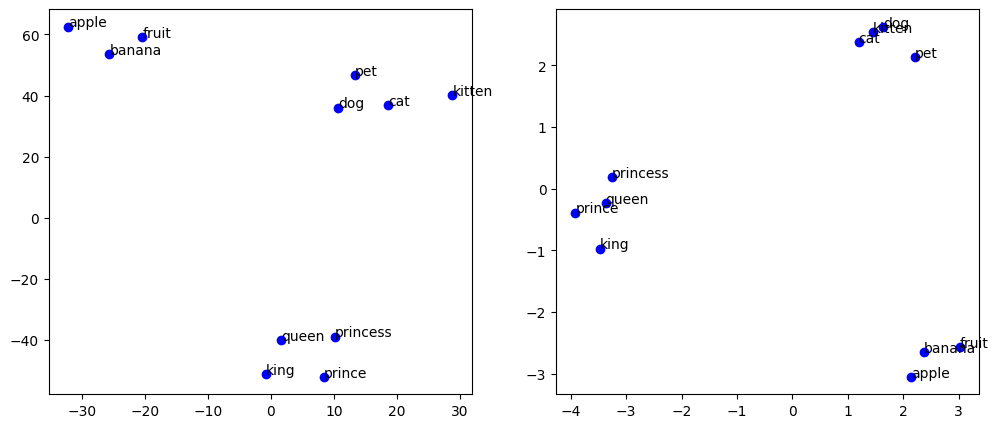

In [10]:
# 시각화
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(word_vectors_2d_tnse[:,0],word_vectors_2d_tnse[:,1],c='blue')
for i ,word in enumerate(words):
  plt.annotate(word,xy=(word_vectors_2d_tnse[i,0],word_vectors_2d_tnse[i,1]))

plt.subplot(1,2,2)
plt.scatter(word_vectors_2d_pca[:,0],word_vectors_2d_pca[:,1],c='blue')
for i ,word in enumerate(words):
  plt.annotate(word,xy=(word_vectors_2d_pca[i,0],word_vectors_2d_pca[i,1]))

plt.show()

정리
```
임베딩 ▶
왜 임베딩이 필요할까 ▶
임베딩의 발전(종류) ▶
  Count기반
  Predict기반
  정적임베딩
    Word2Vec
    Glove
  동적임베딩
    임베딩은 도메인 차이
    ELMo
  Transformer 기반 임베딩(BERT)
    셀프어텐션 기반 : 중오단어에 가중치를 더 부과
    구조 : token(단어),Segment(문장),Position(순서)
시각화
  t-SNE : 내부에 neighbor 알고리즘 이웃의 개수가 기본이 30개 이고 조정가능
  PCA : 특성을 추출해서 차원을 축소    
```

```
다음시간 BERT를 이용해서 파인튜닝
  파인튜닝은 임베딩을 특정 도메인에 맞게 조정
    Bert를 의료데이터로 파인튜닝 CAT --> CT스캔
```